In [9]:
import pandas as pd

file_path = '../data/BankChurners.csv'
df = pd.read_csv(file_path)

In [10]:
# Display the column names of the DataFrame
for column_name in df.columns:
    print(column_name)

CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [11]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## LEGEND

| Column Name                                            | Explanation                                                                   |
|-------------------------------------------------------|-------------------------------------------------------------------------------|
| CLIENTNUM                                             | Client number. Unique identifier for the customer holding the account         |
| Attrition_Flag                                        | Internal event (customer activity) variable - if the account is closed then 1 else 0 |
| Customer_Age                                          | Demographic variable - Customer's Age in Years                                |
| Gender                                                | Demographic variable - M=Male, F=Female                                       |
| Dependent_count                                       | Demographic variable - Number of dependents                                    |
| Education_Level                                       | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) |
| Marital_Status                                        | Demographic variable - Married, Single, Divorced, Unknown                     |
| Income_Category                                       | Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown) |
| Card_Category                                         | Product Variable - Type of Card (Blue, Silver, Gold, Platinum)                 |
| Months_on_book                                       | Period of relationship with bank                                              |
| Total_Relationship_Count                             | Total no. of products held by the customer                                    |
| Months_Inactive_12_mon                               | No. of months inactive in the last 12 months                                  |
| Contacts_Count_12_mon                                | No. of Contacts in the last 12 months                                         |
| Credit_Limit                                         | Credit Limit on the Credit Card                                               |
| Total_Revolving_Bal                                  | Total Revolving Balance on the Credit Card                                    |
| Avg_Open_To_Buy                                      | Open to Buy Credit Line (Average of last 12 months)                            |
| Total_Amt_Chng_Q4_Q1                                 | Change in Transaction Amount (Q4 over Q1)                                      |
| Total_Trans_Amt                                      | Total Transaction Amount (Last 12 months)                                      |
| Total_Trans_Ct                                       | Total Transaction Count (Last 12 months)                                      |
| Total_Ct_Chng_Q4_Q1                                  | Change in Transaction Count (Q4 over Q1)                                      |
| Avg_Utilization_Ratio                                | Average Card Utilization Ratio                                                |
| Naive_Bayes_Classifier_(...)_mon_1 | Naive Bayes |
| Naive_Bayes_Classifier_(...)_mon_2 | Naive Bayes |


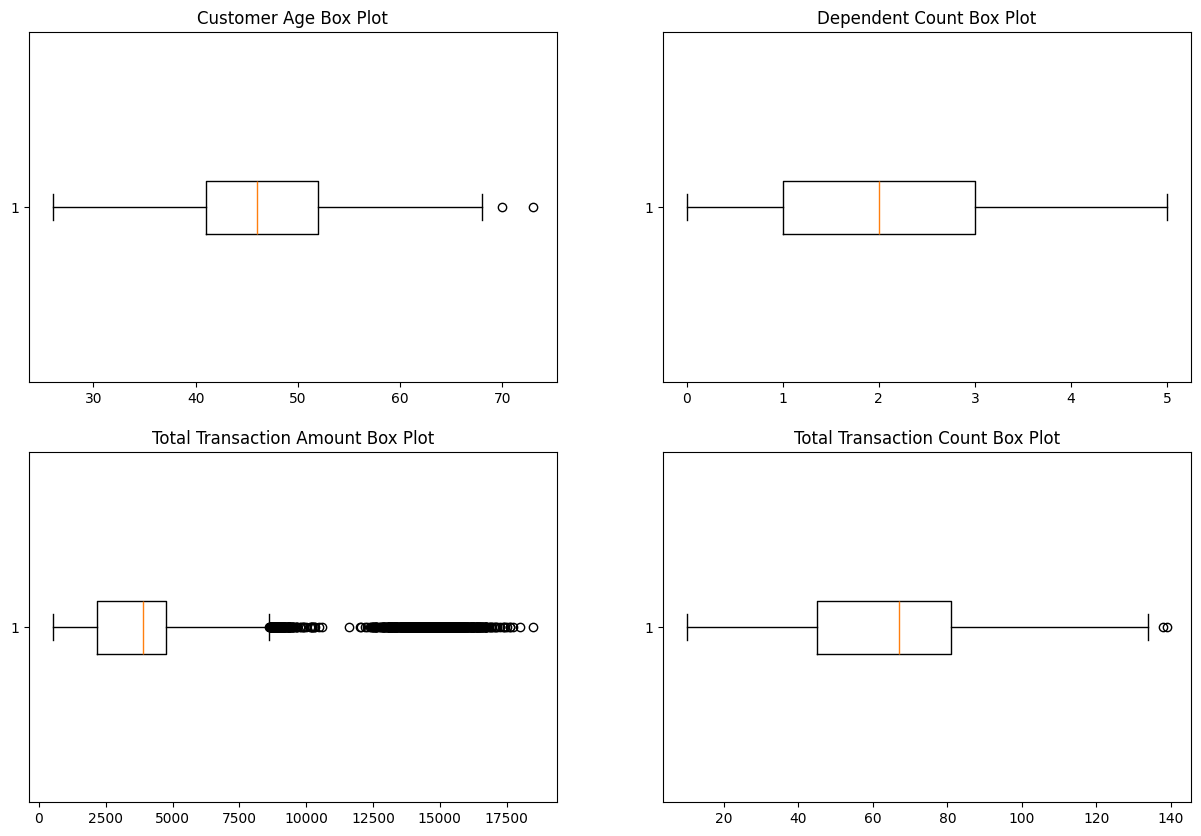

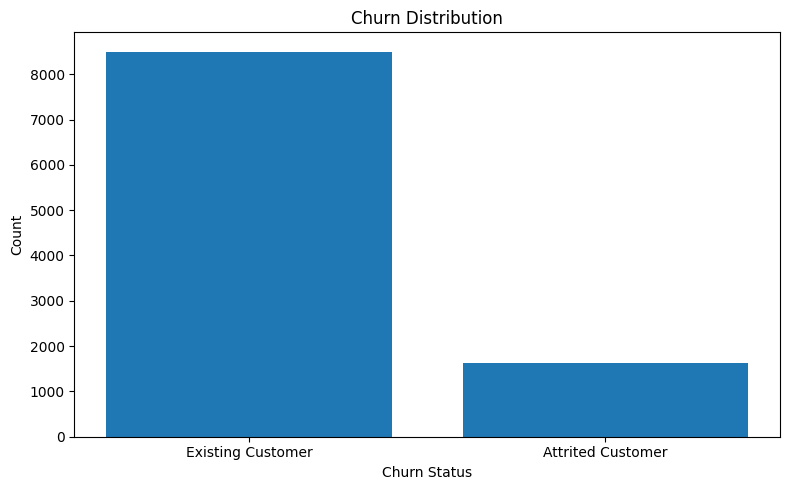

Data Statistics:
       Customer_Age  Dependent_count  Total_Trans_Amt  Total_Trans_Ct
count  10127.000000     10127.000000     10127.000000    10127.000000
mean      46.325960         2.346203      4404.086304       64.858695
std        8.016814         1.298908      3397.129254       23.472570
min       26.000000         0.000000       510.000000       10.000000
25%       41.000000         1.000000      2155.500000       45.000000
50%       46.000000         2.000000      3899.000000       67.000000
75%       52.000000         3.000000      4741.000000       81.000000
max       73.000000         5.000000     18484.000000      139.000000

Churn Distribution:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt

# Select the columns of interest
selected_columns = ['Customer_Age', 'Dependent_count', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Attrition_Flag']
data_subset = df[selected_columns]

# Explore data statistics
data_statistics = data_subset.describe()

# Visualize the relationship between features and churn
plt.figure(figsize=(15, 10))

# Box plots for continuous variables
plt.subplot(2, 2, 1)
plt.boxplot(data_subset['Customer_Age'], vert=False)
plt.title('Customer Age Box Plot')

plt.subplot(2, 2, 2)
plt.boxplot(data_subset['Dependent_count'], vert=False)
plt.title('Dependent Count Box Plot')

plt.subplot(2, 2, 3)
plt.boxplot(data_subset['Total_Trans_Amt'], vert=False)
plt.title('Total Transaction Amount Box Plot')

plt.subplot(2, 2, 4)
plt.boxplot(data_subset['Total_Trans_Ct'], vert=False)
plt.title('Total Transaction Count Box Plot')

# Bar plot for churn
plt.figure(figsize=(8, 5))
churn_counts = data_subset['Attrition_Flag'].value_counts()
plt.bar(churn_counts.index, churn_counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Explore data statistics
print("Data Statistics:")
print(data_statistics)

# Explore churn distribution
print("\nChurn Distribution:")
print(churn_counts)


In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
X = df[['Customer_Age', 'Dependent_count', 'Total_Trans_Amt', 'Total_Trans_Ct']]
y = df['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.8139190523198421
Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.27      0.09      0.14       327
Existing Customer       0.84      0.95      0.90      1699

         accuracy                           0.81      2026
        macro avg       0.56      0.52      0.52      2026
     weighted avg       0.75      0.81      0.77      2026

